In [25]:
import pandas as pd
from pymongo import MongoClient
import json, datetime

In [26]:
client = MongoClient('mongodb://localhost:27017')
db = client.azuki_events
azuki = db.azuki

In [27]:
def parse(event):
    record = {}
    asset = event.get('asset')

    if asset == None:
        return None

    record['collection_name'] = asset['collection']['name']
    record['collection_url'] = "https://opensea.io/collection/" + asset['collection']['slug']
    record['asset_id'] = asset['id']
    record['asset_name'] = asset['name']
    record['asset_description'] = asset['description']
    record['asset_contract_date'] = asset['asset_contract']['created_date']
    record['asset_url'] = asset['permalink']
    record['asset_img_url'] = asset['image_url']
    record['event_id'] = event['id']
    record['event_time'] = event.get('created_date')
    record['event_payment_symbol'] =  None if event.get('payment_token') == None else event.get('payment_token').get('symbol')
    record['usd_price'] = None if event.get('payment_token') == None else event.get('payment_token').get('usd_price')

    decimals = 18
    if event.get('payment_token') != None:
        decimals = event.get('payment_token').get('decimals')

    price_str = event['total_price']

    try: 
        if len(price_str) < decimals:
            price_str =  "0." + (decimals-len(price_str)) * "0" + price_str
            record['event_total_price'] = float(price_str)
        else:
            record['event_total_price'] = float(price_str[:-decimals] + "." + price_str[len(price_str)-decimals:])
    except:
        print(event)

    return record

In [28]:
result = list()
for mf in mfer.find():
    for data in mf['asset_events']:
        clean_data = parse(data)

        if clean_data != None:
            result.append(clean_data)


In [29]:
df = pd.DataFrame(result)

In [30]:
df.to_csv('mfers_events.csv')

In [31]:
df

,collection_name,collection_url,asset_id,asset_name,asset_description,asset_contract_date,asset_url,asset_img_url,event_id,event_time,event_payment_symbol,usd_price,event_total_price
0,Azuki,https://opensea.io/collection/azuki,204256061,Azuki #5497,None,2022-01-10T05:20:15.499138,https://opensea.io/assets/ethereum/0xed5af3886...,https://lh3.googleusercontent.com/F136cG90ZLfx...,6839415617,2022-06-12T13:55:45.541922,WETH,1447.170000000000073000,8.88
1,Azuki,https://opensea.io/collection/azuki,204255800,Azuki #5212,None,2022-01-10T05:20:15.499138,https://opensea.io/assets/ethereum/0xed5af3886...,https://lh3.googleusercontent.com/nO79Op0o0ETG...,6839207771,2022-06-12T13:43:14.544277,WETH,1447.170000000000073000,9.00
2,Azuki,https://opensea.io/collection/azuki,204250318,Azuki #3013,None,2022-01-10T05:20:15.499138,https://opensea.io/assets/ethereum/0xed5af3886...,https://lh3.googleusercontent.com/AjQ6CkCBA9qu...,6835025173,2022-06-12T09:46:57.214278,ETH,1452.150000000000091000,9.99
3,Azuki,https://opensea.io/collection/azuki,206840844,Azuki #9328,None,2022-01-10T05:20:15.499138,https://opensea.io/assets/ethereum/0xed5af3886...,https://lh3.googleusercontent.com/137uTZ2h5SY2...,6834470467,2022-06-12T09:15:25.516938,ETH,1452.150000000000091000,9.70
4,Azuki,https://opensea.io/collection/azuki,204238723,Azuki #593,None,2022-01-10T05:20:15.499138,https://opensea.io/assets/ethereum/0xed5af3886...,https://lh3.googleusercontent.com/C5hIIxOpan4o...,6834432581,2022-06-12T09:13:14.976110,ETH,1452.150000000000091000,9.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25903,Azuki,https://opensea.io/collection/azuki,204242408,Azuki #1431,None,2022-01-10T05:20:15.499138,https://opensea.io/assets/ethereum/0xed5af3886...,https://lh3.googleusercontent.com/_Ps570ExKE5l...,2859551627,2022-01-12T18:18:45.683846,ETH,1454.109999999999900000,2.00
25904,Azuki,https://opensea.io/collection/azuki,204242284,Azuki #1362,None,2022-01-10T05:20:15.499138,https://opensea.io/assets/ethereum/0xed5af3886...,https://lh3.googleusercontent.com/OfS6enz07yzZ...,2859551529,2022-01-12T18:18:45.196869,ETH,1454.109999999999900000,1.97
25905,Azuki,https://opensea.io/collection/azuki,204246916,Azuki #2442,None,2022-01-10T05:20:15.499138,https://opensea.io/assets/ethereum/0xed5af3886...,https://lh3.googleusercontent.com/iQ7h3O28RP2B...,2859551387,2022-01-12T18:18:44.722717,ETH,1454.109999999999900000,1.85
25906,Azuki,https://opensea.io/collection/azuki,204239099,Azuki #845,None,2022-01-10T05:20:15.499138,https://opensea.io/assets/ethereum/0xed5af3886...,https://lh3.googleusercontent.com/21PLrybQUE4l...,2859551197,2022-01-12T18:18:43.872827,ETH,1454.109999999999900000,1.99


In [32]:
# Start from creation to now
df = df.iloc[::-1]

In [33]:
df['event_time'] = pd.to_datetime(df['event_time'])
df.set_index(['event_time'])

,collection_name,collection_url,asset_id,asset_name,asset_description,asset_contract_date,asset_url,asset_img_url,event_id,event_payment_symbol,usd_price,event_total_price
event_time,,,,,,,,,,,,
2022-01-12 18:18:42.879999,Azuki,https://opensea.io/collection/azuki,204242355,Azuki #1430,None,2022-01-10T05:20:15.499138,https://opensea.io/assets/ethereum/0xed5af3886...,https://lh3.googleusercontent.com/5QzuXPdvI1Es...,2859550953,ETH,1454.109999999999900000,2.00
2022-01-12 18:18:43.872827,Azuki,https://opensea.io/collection/azuki,204239099,Azuki #845,None,2022-01-10T05:20:15.499138,https://opensea.io/assets/ethereum/0xed5af3886...,https://lh3.googleusercontent.com/21PLrybQUE4l...,2859551197,ETH,1454.109999999999900000,1.99
2022-01-12 18:18:44.722717,Azuki,https://opensea.io/collection/azuki,204246916,Azuki #2442,None,2022-01-10T05:20:15.499138,https://opensea.io/assets/ethereum/0xed5af3886...,https://lh3.googleusercontent.com/iQ7h3O28RP2B...,2859551387,ETH,1454.109999999999900000,1.85
2022-01-12 18:18:45.196869,Azuki,https://opensea.io/collection/azuki,204242284,Azuki #1362,None,2022-01-10T05:20:15.499138,https://opensea.io/assets/ethereum/0xed5af3886...,https://lh3.googleusercontent.com/OfS6enz07yzZ...,2859551529,ETH,1454.109999999999900000,1.97
2022-01-12 18:18:45.683846,Azuki,https://opensea.io/collection/azuki,204242408,Azuki #1431,None,2022-01-10T05:20:15.499138,https://opensea.io/assets/ethereum/0xed5af3886...,https://lh3.googleusercontent.com/_Ps570ExKE5l...,2859551627,ETH,1454.109999999999900000,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-12 09:13:14.976110,Azuki,https://opensea.io/collection/azuki,204238723,Azuki #593,None,2022-01-10T05:20:15.499138,https://opensea.io/assets/ethereum/0xed5af3886...,https://lh3.googleusercontent.com/C5hIIxOpan4o...,6834432581,ETH,1452.150000000000091000,9.88
2022-06-12 09:15:25.516938,Azuki,https://opensea.io/collection/azuki,206840844,Azuki #9328,None,2022-01-10T05:20:15.499138,https://opensea.io/assets/ethereum/0xed5af3886...,https://lh3.googleusercontent.com/137uTZ2h5SY2...,6834470467,ETH,1452.150000000000091000,9.70
2022-06-12 09:46:57.214278,Azuki,https://opensea.io/collection/azuki,204250318,Azuki #3013,None,2022-01-10T05:20:15.499138,https://opensea.io/assets/ethereum/0xed5af3886...,https://lh3.googleusercontent.com/AjQ6CkCBA9qu...,6835025173,ETH,1452.150000000000091000,9.99


In [34]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

<Figure size 1440x576 with 0 Axes>

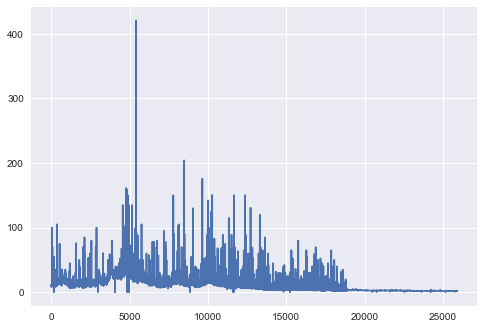

<Figure size 1440x576 with 0 Axes>

In [38]:
fig, ax = plt.subplots()
df.event_total_price.plot()
plt.figure(figsize=(20, 8))